Import the Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
train_data = pd.read_csv('Churn Prdiction Data\churn-bigml-80.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [7]:
test_data = pd.read_csv('Churn Prdiction Data\churn-bigml-20.csv')


Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

for col in ['International plan','Voice mail plan']:
    train_data[col] = label_enc.fit_transform(train_data[col])
    test_data[col] = label_enc.fit_transform(test_data[col])

train_data['Churn'] = train_data['Churn'].astype(int)
test_data['Churn'] = test_data['Churn'].astype(int)

train_data.drop(columns=['State'],inplace=True)
test_data.drop(columns=['State'],inplace=True)


Features And Target 

In [14]:
X_train = train_data.drop(columns=['Churn'])
y_train = train_data['Churn']

X_test = test_data.drop(columns=['Churn'])
y_test = test_data['Churn']

Standardise Features

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic ModeL Regression

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [17]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

Evaluate Model

In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8530734632683659

In [23]:
precision = precision_score(y_test, y_pred)
precision

0.4594594594594595

In [24]:
recall = recall_score(y_test, y_pred)
recall

0.17894736842105263

In [25]:
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

np.float64(0.8256716967243284)

Confusion Matrix

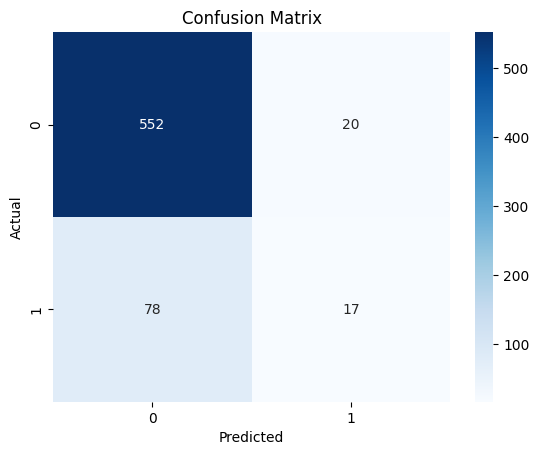

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

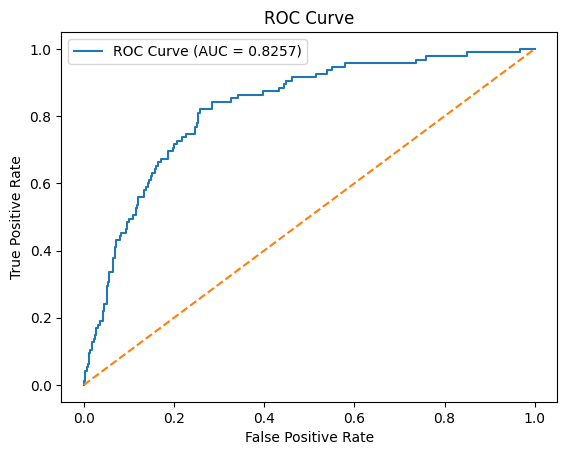

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [29]:
import numpy as np
coef_df = pd.DataFrame({'Feature': train_data.drop(columns=['Churn']).columns, 'Coefficient': model.coef_[0]})
coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Odds Ratio', ascending=False)
coef_df

,Feature,Coefficient,Odds Ratio
17,Customer service calls,0.662390,1.939422
2,International plan,0.630582,1.878703
4,Number vmail messages,0.413031,1.511392
7,Total day charge,0.340067,1.405042
5,Total day minutes,0.339970,1.404906
8,Total eve minutes,0.144220,1.155138
10,Total eve charge,0.142870,1.153580
16,Total intl charge,0.142173,1.152776
14,Total intl minutes,0.136066,1.145758
11,Total night minutes,0.071235,1.073833
